In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('dengue_data.csv', encoding = 'latin1')

In [ ]:
dataset.shape

(150, 13)

In [ ]:
dataset.head()

,Año,Mes,Temperatura maxima,Temperatura minima,Temperatura promedio,Fenomeno,Precipitación acumulada,Temporada de lluvias,Inundaciones,n damnificados inundaciones,Encharcamientos,Damnificados por encharcamientos,N casos dengue
0,2009,Ene,23.5,4.0,14.05,Niña,476.9,Lluvioso,1,0,5,0,127
1,2009,Feb,23.8,5.1,14.22,Niña,796.7,Lluvioso,4,60,61,1,36
2,2009,Mar,23.7,7.3,14.32,Niña,1092.3,Lluvioso,4,7,35,2,26
3,2009,Abr,24.4,5.7,14.71,Neutro,686.0,Lluvioso,2,0,25,5,52
4,2009,May,22.8,5.4,14.58,Neutro,243.4,Normal,1,2,7,0,37


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Año                               150 non-null    int64  
 1   Mes                               150 non-null    object 
 2   Temperatura maxima                150 non-null    float64
 3   Temperatura minima                150 non-null    float64
 4   Temperatura promedio              150 non-null    float64
 5   Fenomeno                          150 non-null    object 
 6   Precipitación acumulada           150 non-null    float64
 7   Temporada de lluvias              150 non-null    object 
 8   Inundaciones                      150 non-null    int64  
 9   n damnificados inundaciones       150 non-null    int64  
 10  Encharcamientos                   150 non-null    int64  
 11  Damnificados por encharcamientos  150 non-null    int64  
 12  N casos 

In [ ]:
dataset = dataset.drop(['Fenomeno'],axis=1)

# Analizando como se comporto el clima, las consecuencias del mismo y los casos de dengue en bogota a traves del tiempo

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

# Temperaturas a traves del tiempo

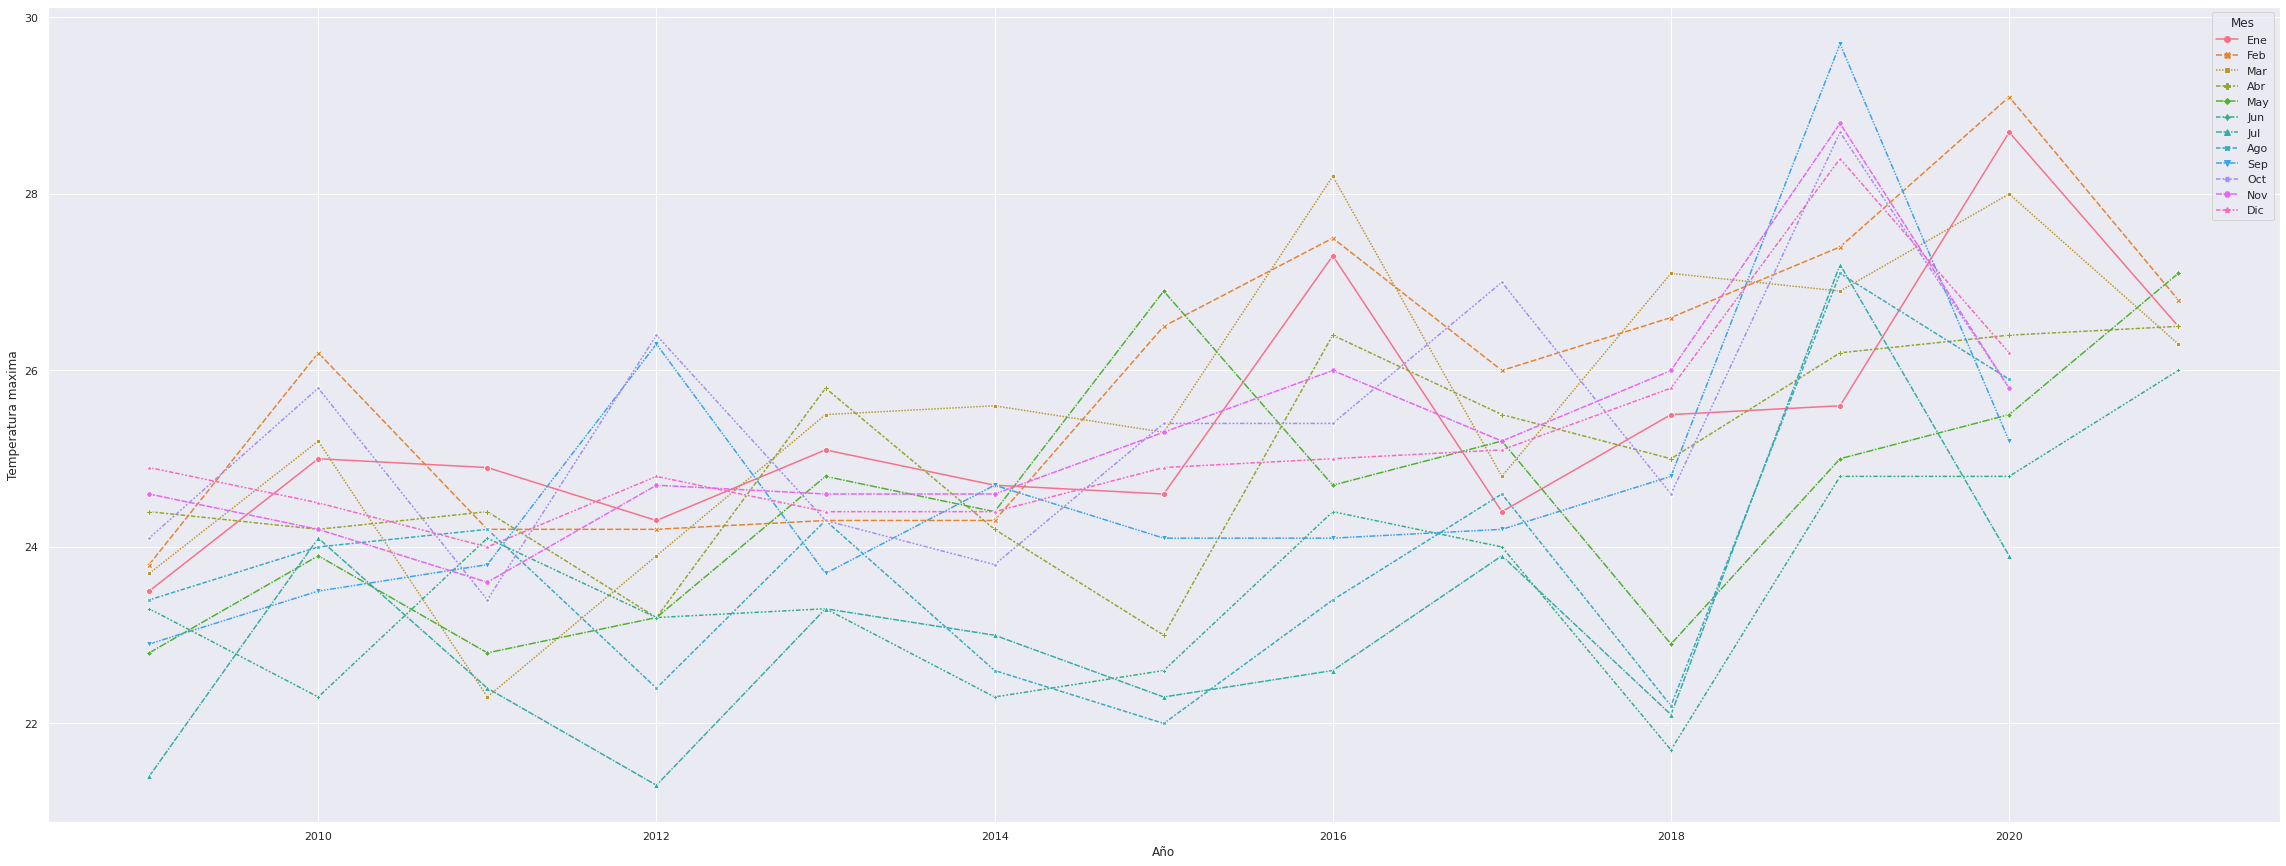

In [ ]:
_ = plt.subplots(figsize = (40,15))
_ = sns.lineplot(data = dataset, x = 'Año', y = 'Temperatura maxima', hue = 'Mes',style = 'Mes', markers = True, ci = 68)

**La temperatura maxima de bogota a lo largo del 2010 hasta el 2020 esta subiendo levemente, Si nos fijamos en la grafica los picos mas altos cada vez son mas altos, Tambien si nos fijamos bien el comportamiento de la temperatura maxima en cada mes del año es diferente pero la tendencia es hacia arriba.**

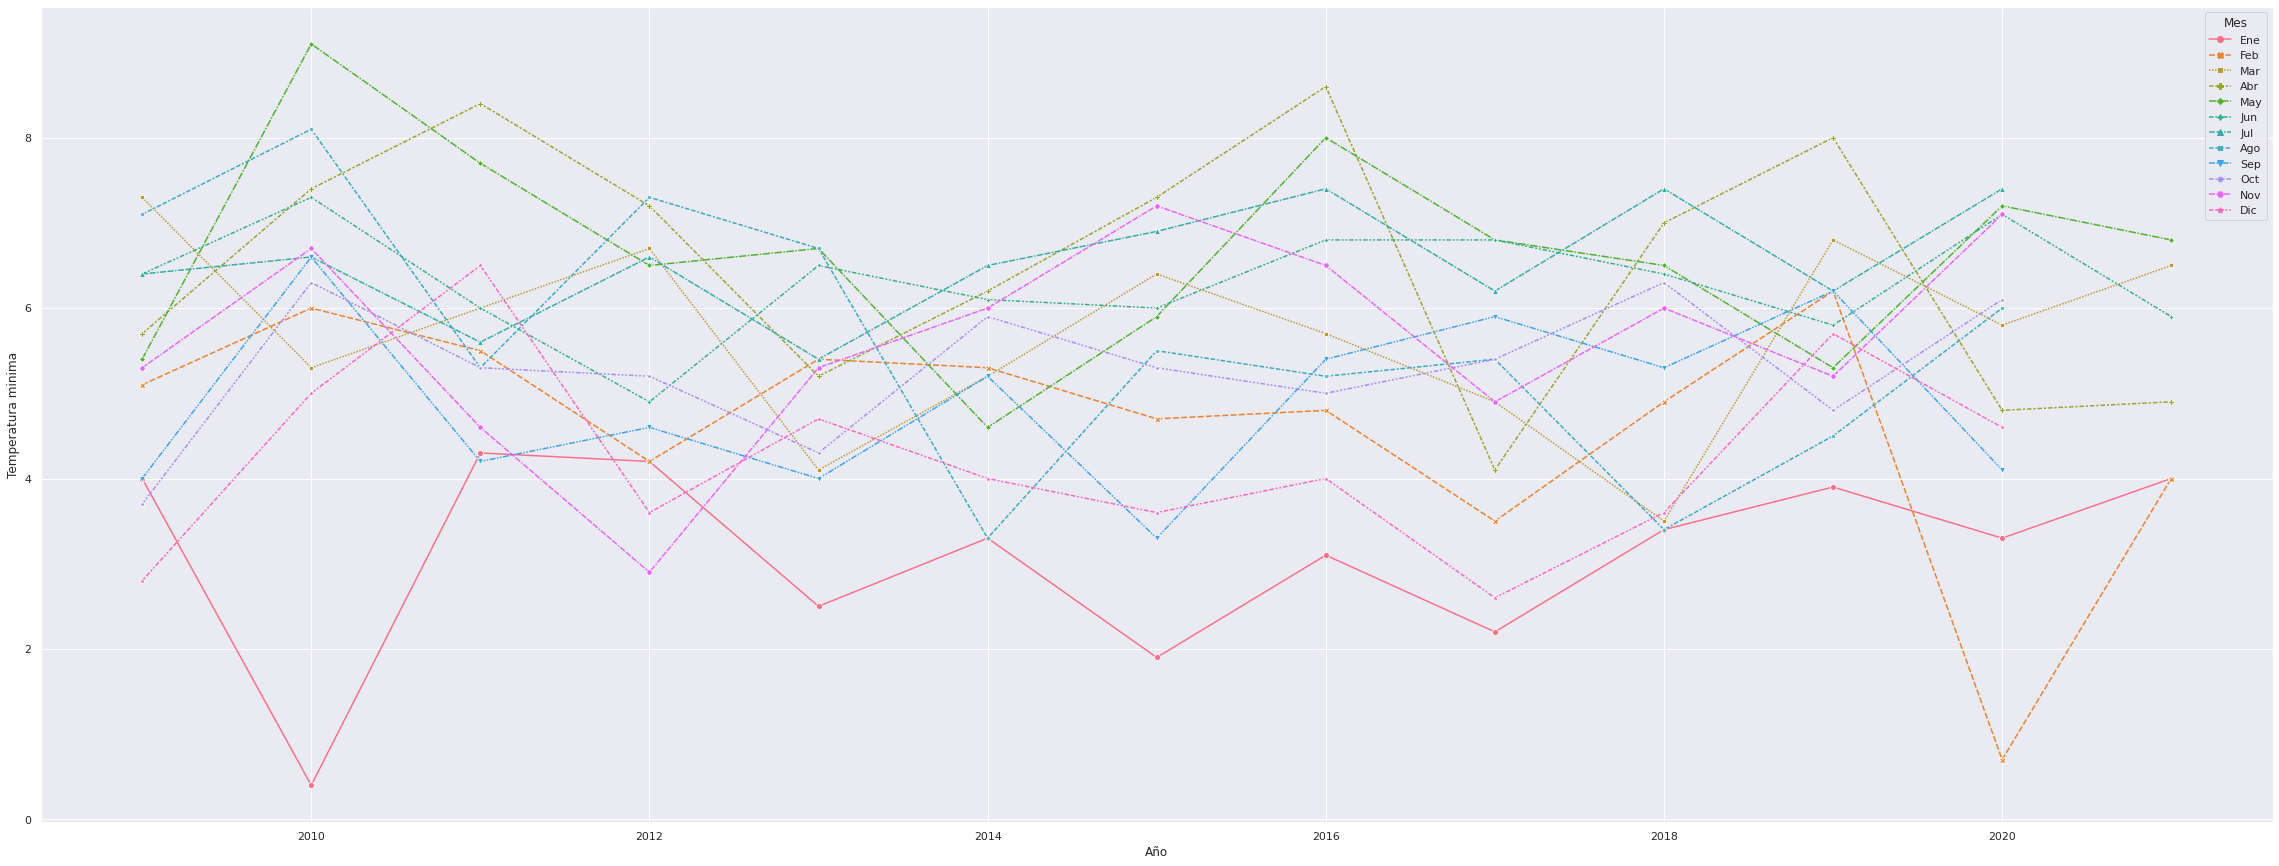

In [ ]:
_ = plt.subplots(figsize = (40,15))
_ = sns.lineplot(data = dataset, x = 'Año', y = 'Temperatura minima', hue = 'Mes',style = 'Mes', markers = True, ci = 68)

**En cambio los minimos registros de temperatura me muestran una tendencia a travez del tiempo lateral, de igual manera con la grafica anterior cada mes se comporta de manera diferente..**

# Veamos como se comporta la temperatura promedio a travez del mes por cada año

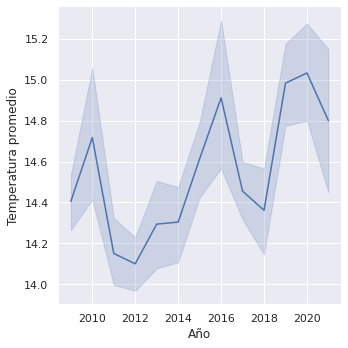

In [ ]:
sns.relplot(data=dataset, x="Año", y="Temperatura promedio", kind="line")

**La temperatura promedio en bogota viene subiendo es claro que la tendencia es para arriba, en la grafica se pueden ver picos y majos cada vez mas altos.**

# Exploro en que epoca del año se sube o se baja la precipitación acumulada, esto puede que esta relacionado con las epocas con mas lluvias

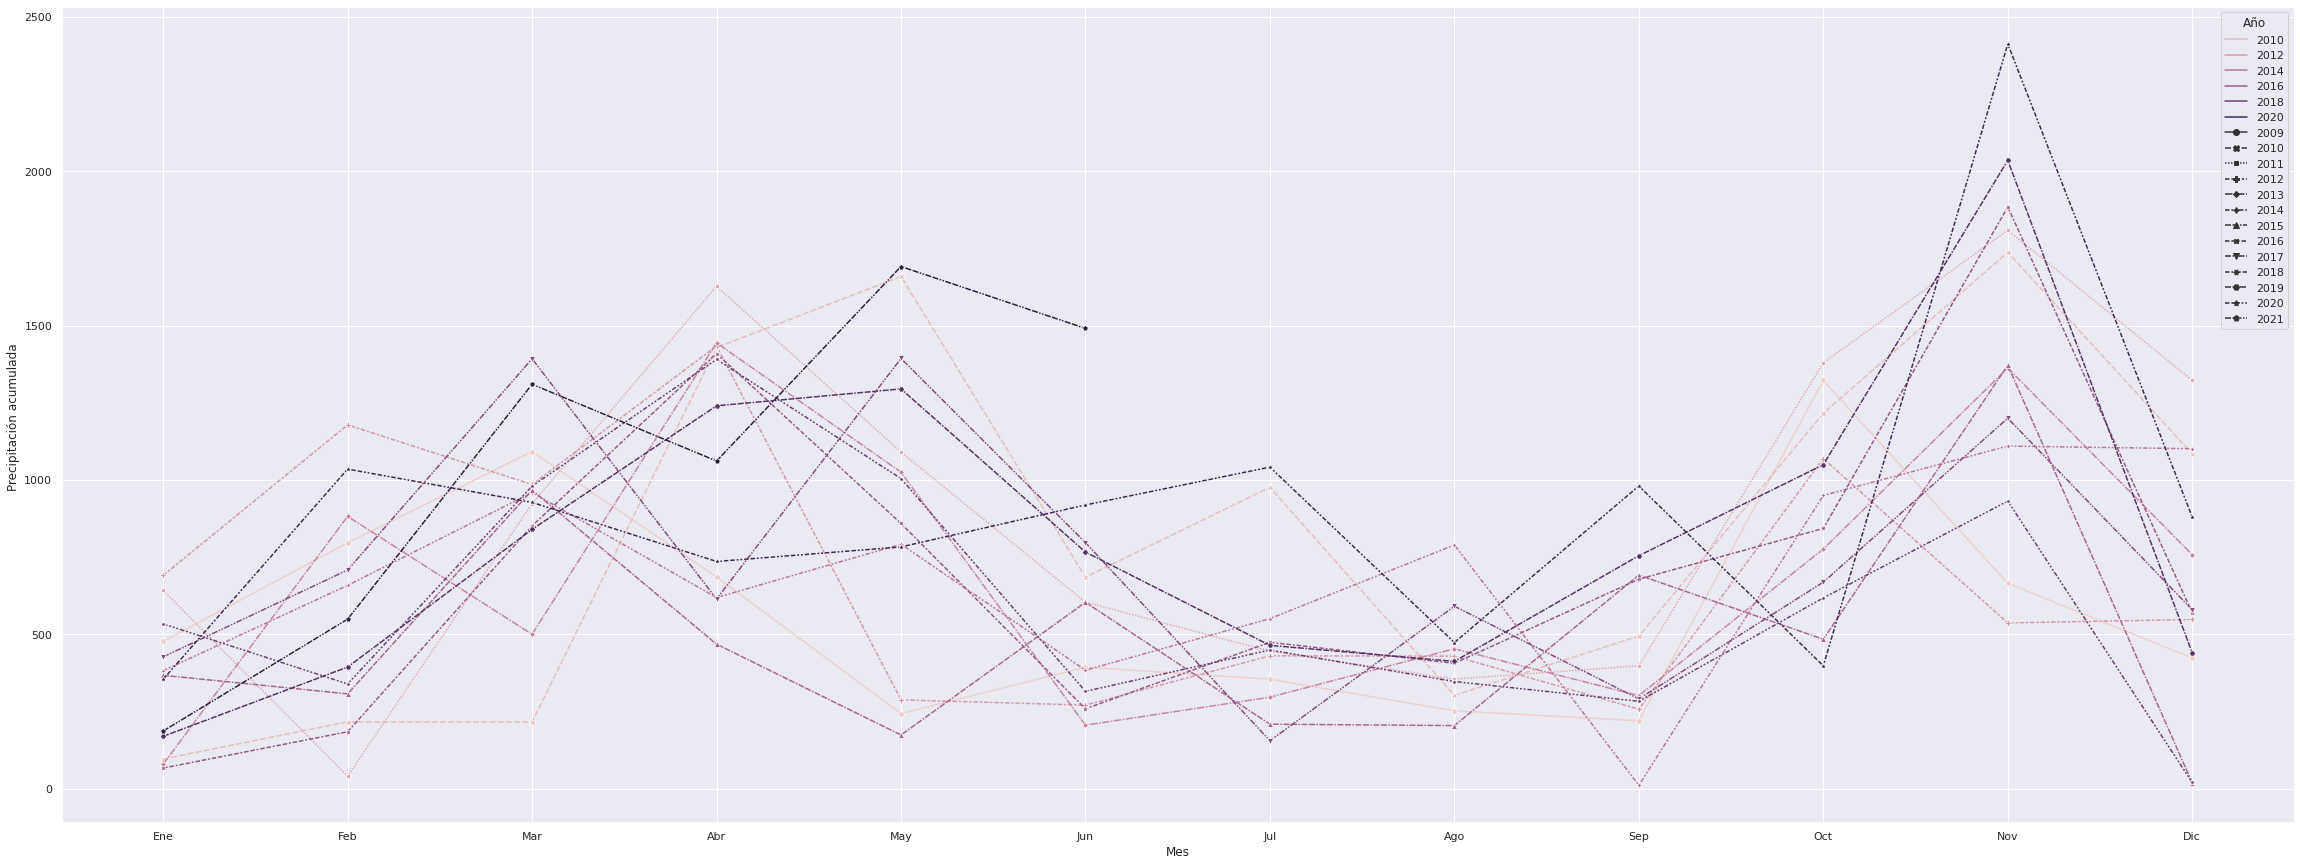

In [ ]:
_ = plt.subplots(figsize = (40,15))
_ = sns.lineplot(data = dataset, x = 'Mes', y = 'Precipitación acumulada ', hue = 'Año',style = 'Año', markers = True, ci = 68)

**Fijémonos que el comportamiento a lo largo del año de la Precipitación acumulada en todos los años es muy similar, en noviembre, mayo y noviempre es cuando hay mas precipitación acumulada.**

# Exploro si existe una correlación entre con la precipitación y el registro de inundaciones por lluvias.

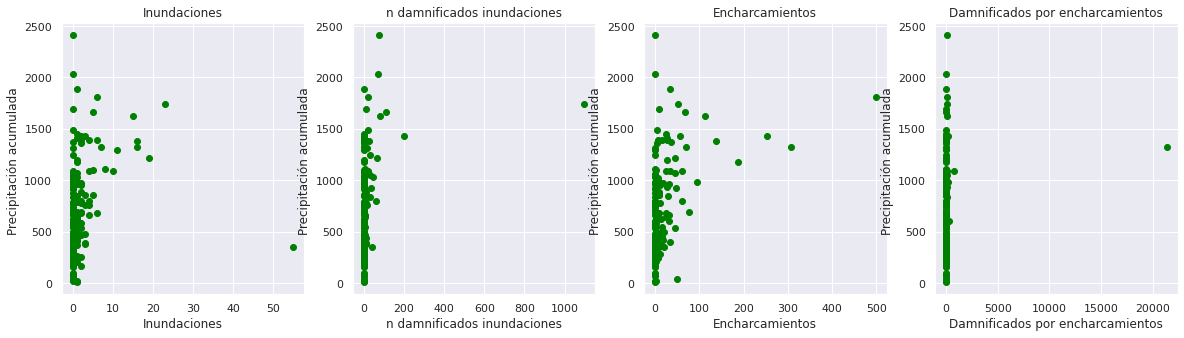

In [ ]:
columnas = ['Inundaciones','n damnificados inundaciones','Encharcamientos','Damnificados por encharcamientos']
objetivo = dataset['Precipitación acumulada ']

for i, col in enumerate (columnas):
    plt.subplot(1, len(columnas), i+1)
    x = dataset[col]
    y = objetivo
    plt.scatter(x, y, marker = 'o',color='green')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Precipitación acumulada ')
plt.show()

In [ ]:
lluvias = dataset[['Precipitación acumulada ','Inundaciones','n damnificados inundaciones','Encharcamientos','Damnificados por encharcamientos']]

<function matplotlib.pyplot.show>

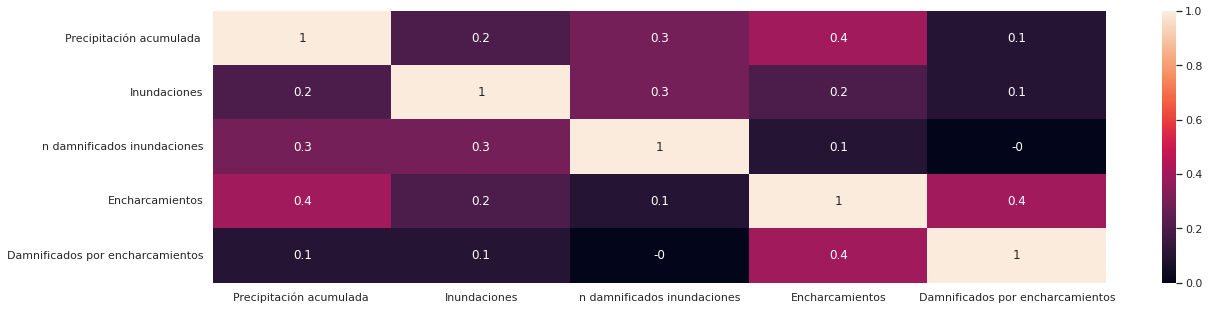

In [ ]:
matriz_correlacion = lluvias.corr().round(1)
sns.heatmap(data = matriz_correlacion, annot = True)
plt.show

**Existe una correlación muy leve entre Precipitación acumulada con el numero de inundaciones y el numero de damnificados por inundaciones la correlacion es mas fuerte con Encharcamientos**

**Lo que quiere decir que entre mas precipitación mas lluvias, esto proboca inundaciones y encharcamientos en la ciudad**

# Ahora exploro si existe una correlacion con el tema de los encharcamientos el clima en la ciudad y los casos de dengue en bogota.

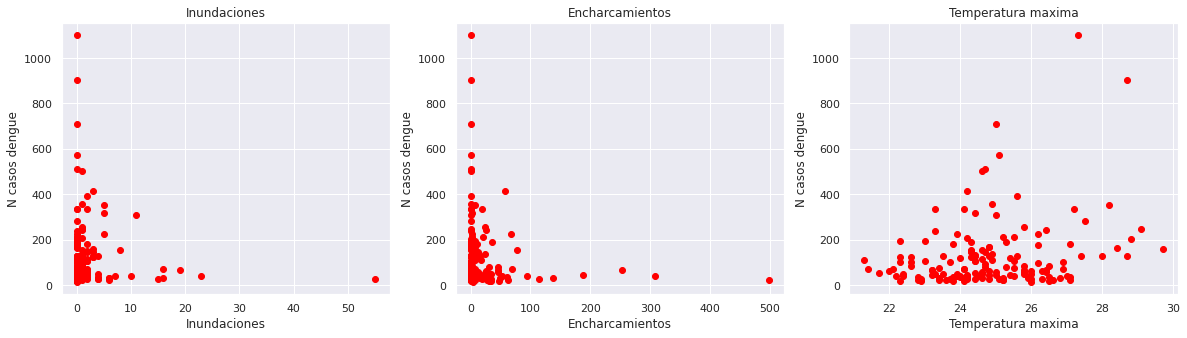

In [170]:
columnas = ['Inundaciones','Encharcamientos','Temperatura maxima']
objetivo = dataset['N casos dengue']

for i, col in enumerate (columnas):
    plt.subplot(1, len(columnas), i+1)
    x = dataset[col]
    y = objetivo
    plt.scatter(x, y, marker = 'o',color='red')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('N casos dengue')
plt.show()

In [171]:
casos_dengue = dataset[['N casos dengue','Inundaciones','Encharcamientos','Damnificados por encharcamientos',
                        'Temperatura maxima']]

<function matplotlib.pyplot.show>

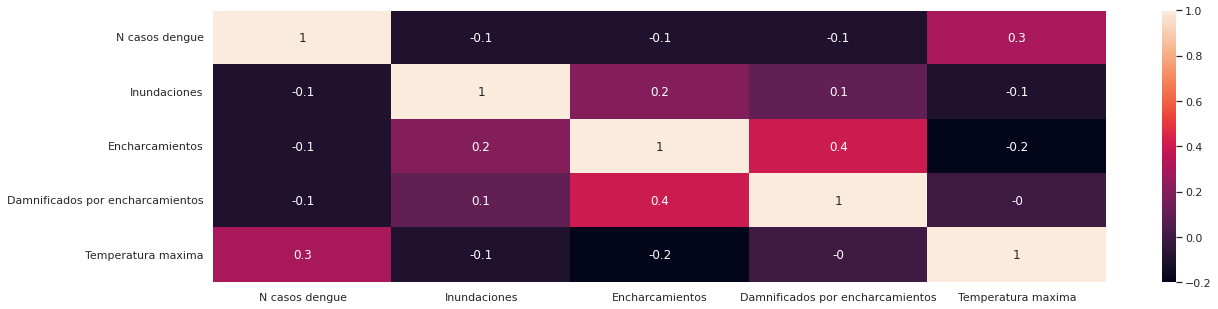

In [172]:
matriz_correlacion = casos_dengue.corr().round(1)
sns.heatmap(data = matriz_correlacion, annot = True)
plt.show

**las lluvias, el encharcamiento, las inundaciones y el incremento de la temperatura esta relacionado con los casos de dengue en bogota**

**Por ahora los casos de dengue son pocos en comparación con otras regiones del pais que son de clima calido**

**Si la temperatura de Bogota continua subiendo como lo viene haciendo y esto sumado con las lluvias extremas muy seguramente los casos de dengue seguiran aumentando.**